In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pysam
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from collections import Counter
from random import randint

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [5]:
def assign_color():
    
    return (str(randint(0, 255)) + ',' + str(randint(0, 255)) + ',' + str(randint(0, 255)))

In [99]:
def color_reads(in_file):
    
    st = pysam.AlignmentFile(in_file,"rb")
    st.reset()
    reads = st.fetch(until_eof=True)
    
    color_map = {}
    for r in reads:
        if not r.query_name in color_map:
            color_map.update({r.query_name:assign_color()})
    
    out_file = "%s.colored.bam" % os.path.splitext(in_file)[0]
    colored_reads = pysam.AlignmentFile('tmp.bam', 'wb', template=st)
    
    st.reset()
    reads = st.fetch(until_eof=True)
    for r in reads:
        if r.has_tag('RG'):
            r.set_tag('RG', None)
        color = color_map[r.query_name]
        r.tags += [('YC', color)]
        colored_reads.write(r)

    colored_reads.close()
    pysam.sort("-o", out_file, 'tmp.bam')
    pysam.index(out_file)

In [6]:
in_file = '/data/parastou/Star-Lab/test/NStar25.Aligned.out.tagged.bam'

In [11]:
def color_umi_group(in_file, xm):
    
    st = pysam.AlignmentFile(in_file, 'rb')
    st.reset()
    reads = st.fetch(until_eof=True)
    
    color = assign_color()
    
    out_file = '%s.colored.bam' % os.path.splitext(in_file)[0]
    colored_reads = pysam.AlignmentFile('tmp.bam', 'wb', template=st)
    
    st.reset()
    reads = st.fetch(until_eof=True)
    for r in reads:
        if r.get_tag('XM') == xm:
            if r.has_tag('RG'):
                r.set_tag('RG', None)
            r.tags += [('YC', color)]
        colored_reads.write(r)

    colored_reads.close()
    pysam.sort("-o", out_file, 'tmp.bam')
    pysam.index(out_file)

In [13]:
def umi_group_to_file(in_file, xm, colored=False):
    
    st = pysam.AlignmentFile(in_file, 'rb')
    st.reset()
    reads = st.fetch(until_eof=True)
    
    color = assign_color()
    
    out_file = os.path.splitext(in_file)[0] + xm + '.bam'
    xm_reads = pysam.AlignmentFile('tmp.bam', 'wb', template=st)
    
    st.reset()
    reads = st.fetch(until_eof=True)
    for r in reads:
        if r.get_tag('XM') == xm:
            if colored:
                if r.has_tag('RG'):
                    r.set_tag('RG', None)
                r.tags += [('YC', color)]
            xm_reads.write(r)

    xm_reads.close()
    pysam.sort("-o", out_file, 'tmp.bam')
    pysam.index(out_file)

In [12]:
color_umi_group(in_file, 'GTTTTTCCCC')

In [15]:
umi_group_to_file(in_file, 'GTTTTTCCCC', True)

In [100]:
in_file = '/data/parastou/Star-Lab/Experiments/Complete-HGsample_AATGTA_CGTGTGCGTT/Alignments2/NStar25.Aligned.out.bam'
#in_file = '/data/parastou/Star-Lab/Alignments/NStar1.Aligned.out.bam'
#in_file = '/data/parastou/Star-Lab/Alignments/NStar25.Aligned.out.bam'
#in_file = '/data/parastou/Star-Lab/Alignments/NStar3.Aligned.out.bam'

'L183:338:CAGAAANXX:4:1211:13492:40917' : CCCCAGGACGTACATTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTA unmapped

In [101]:
color_reads(in_file)

In [105]:
def bam_to_df(in_file):
    
    st = pysam.AlignmentFile(in_file,"rb")
    reads = st.fetch(until_eof=True)
    
    nh = 0
    ref = None
    ref_st = None

    rl = []
    for r in reads:
        qn = r.query_name
        if r.has_tag('NH') and r.get_tag('NH')>0:
            nh = r.get_tag('NH')
            ref = r.reference_name
            ref_st = r.reference_start
        cigar = r.cigarstring
        props = (qn, ref, ref_st, nh, cigar, ref+':'+str(ref_st))       
        rl.append(props)
        df = pd.DataFrame(rl, columns=['QName','Ref','Start','NH','CIGAR','IGV-MAP'])
    return df

In [30]:
#Read name = L183:338:CAGAAANXX:4:2314:3274:51709 the only spliced alignment

chr12
51874778
36M117854N14M

chr6
123984116
50M

chr20
5568662
50M

chr12
7681058
50M

chr12
42837892
50M

chr3
196347126
50M

chr17_GL000258v2_alt
585779
50M

chr17
46201121
50M

chr17_KI270908v1_alt
903223
50M

chr17_GL000258v2_alt
1368251
50M

chr19
12541305
50M

chr1
14445235
50M

chr20
37004470
50M

chr1
89036972
50M

chr1
161380531
50M

chr7
68545430
50M

chr2
230679437
50M

chr3
195391435
50M

chr15
40499857
50M

chr6
111897754
50M

chr11
8742822
50M

chr1
43060711
50M

chr3
13366882
50M

chr20
51855641
50M

chr3
186895091
50M

chr13
100008293
50M

chrX
53987467
50M

chr9
69039010
50M

chr7
105495917
50M

chr17
49392652
50M

chr9
111866555
50M

chr11
29299946
50M

chr4
87499085
50M

chr11
78110401
50M

chr10
126505712
50M

chr1
26105464
50M

chr1
156478739
50M

chr9
116429096
50M



Show alignments per read and ref:

In [106]:
rl1 = bam_to_df(in_file)

In [107]:
for qn, group in rl1.groupby(['QName']):
    print qn
    print group
    print '-' * 80

L183:338:CAGAAANXX:4:2112:19231:18689
                                    QName                      Ref      Start  \
43  L183:338:CAGAAANXX:4:2112:19231:18689                    chr21    8254039   
44  L183:338:CAGAAANXX:4:2112:19231:18689                    chr21    8437074   
45  L183:338:CAGAAANXX:4:2112:19231:18689                    chr21    8392864   
46  L183:338:CAGAAANXX:4:2112:19231:18689                    chr21    8209829   
47  L183:338:CAGAAANXX:4:2112:19231:18689                    chr21    8988370   
48  L183:338:CAGAAANXX:4:2112:19231:18689         chrUn_GL000220v1     109276   
49  L183:338:CAGAAANXX:4:2112:19231:18689         chrUn_GL000220v1     153248   
50  L183:338:CAGAAANXX:4:2112:19231:18689  chr22_KI270733v1_random     126129   
51  L183:338:CAGAAANXX:4:2112:19231:18689  chr22_KI270733v1_random     171210   
52  L183:338:CAGAAANXX:4:2112:19231:18689                     chrY   10197454   
53  L183:338:CAGAAANXX:4:2112:19231:18689                     chr2  132

In [108]:
for ref, group in rl1.groupby(['Ref']):
    print ref
    print group
    print '-' * 80

chr11
                                   QName    Ref     Start  NH  CIGAR  \
15  L183:338:CAGAAANXX:5:1205:2404:66573  chr11  61768036  19  9S41M   

           IGV-MAP  
15  chr11:61768036  
--------------------------------------------------------------------------------
chr12
                                   QName    Ref     Start  NH  CIGAR  \
21  L183:338:CAGAAANXX:5:1205:2404:66573  chr12  83820549  19  41M9S   

           IGV-MAP  
21  chr12:83820549  
--------------------------------------------------------------------------------
chr14
                                   QName    Ref     Start  NH  CIGAR  \
0   L183:338:CAGAAANXX:5:1102:9969:41353  chr14  16055100  15    50M   
22  L183:338:CAGAAANXX:5:1205:2404:66573  chr14  55160116  19  4S46M   

           IGV-MAP  
0   chr14:16055100  
22  chr14:55160116  
--------------------------------------------------------------------------------
chr16
                                   QName    Ref     Start  NH         CIGAR  \


---------------------------------------------

Find cluster regions

In [21]:
gb = rl1.groupby(['Ref'])
groups = dict(list(gb))
starts = sorted(list(groups['chr21']['Start']))

In [49]:
print starts[0]
print starts[-1]

8210158
8988699


In [143]:
#from itertools import tee, izip
def gapsofsize(l, length):
    
    interval = sorted(l)
    a = interval[1:]
    b = interval[:-1]
    first = interval[0]
    last = interval[-1]
    it = zip(a,b)
    
    starts = [first]
    ends = [last]

    for i,j in zip(a,b):
        if i - j > length:
            gaps += [j, i]
            starts.append(j)
            ends.append(i)
    
    return zip(starts,ends)
    #next(b, None)
    #return ( p for x, y in izip(a, b) if y-x < length+1 for p in xrange(x+1,y) )


#print list(gapsofsize(starts, 1500))
gapsofsize(starts, 1500)

8210123 8254039
8254333 8392864
8393158 8437074
8437368 8988370
8988664 40043175


In [60]:
in_file = '/data/parastou/Star-Lab/Experiments/Complete-HGsample_AATGTA_AGCTCTTGTA/Alignments/NStar1.Aligned.out.bam'
chr_name = 'chr21'
xm = 'AGCTCTTGTA' 

r1 = [8210158 - 1500, 8210605 + 1500]
r2 = [8254473 - 1500, 8254813 + 1500]
r3 = [8393193 - 1500, 8393640 + 1500]
r4 = [8437403 - 1500, 8437850 + 1500]

-----------------------------

Calculate the distribution of cluster NH variability among all UMI groups

In [23]:
st = pysam.AlignmentFile('/data/parastou/Star-Lab/test/NStar10.Aligned.sorted.out.tagged.bam','rb')
reads = st.fetch(until_eof=True)

In [30]:
st.reset()
reads = st.fetch(until_eof=True)
umi_map = {}
for r in reads:
    xm = r.get_tag('XM')
    qn = r.query_name
    nh = r.get_tag('NH')
    if not xm in umi_map:
        umi_map.update({xm:{qn:nh}})
    else:
        if not qn in umi_map[xm]:
            umi_map[xm].update({qn:nh})

In [32]:
umi_var_dist = {}
for key in umi_map:
    vals = umi_map[key].values()
    umi_var_dist.update({key:vals})

In [52]:
X = []
Y = []
for item in umi_var_dist.values():
    X.append(len(item))
    Y.append(len(set(item)))

In [68]:
norm = []
for i,j in zip(X,Y):
    norm.append(round(float(j)/i,2))

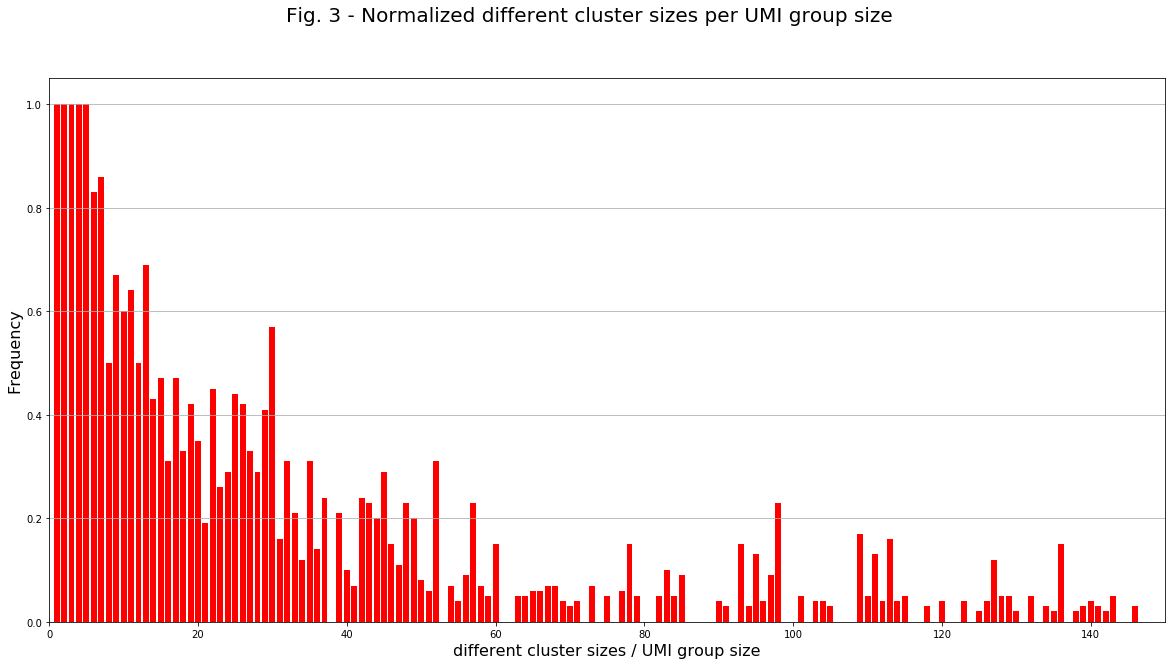

In [78]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Fig. 3 - Normalized different cluster sizes per UMI group size', fontsize=20)

data1 = X
data2 = norm

plt.xlim(0, 150)
#plt.xticks(range(0,len(data1),.1))
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('different cluster sizes / UMI group size', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.bar(data1, data2, width=0.8, color='r', align='center')
#plt.show()
plt.savefig('/home/parastou/dist3')

In [110]:
a = '6    chr21:8437398  7    chr21:8393188  8    chr21:8210153  9    chr21:8988694  34   chr21:8254084  35   chr21:8437119  36   chr21:8392909  37   chr21:8209874  38   chr21:8988415  43   chr21:8254039  44   chr21:8437074  45   chr21:8392864  46   chr21:8209829  47   chr21:8988370  56   chr21:8254136  57   chr21:8437171  58   chr21:8392961  59   chr21:8209926  60   chr21:8988467  65   chr21:8254265  66   chr21:8437300  67   chr21:8393090  68   chr21:8210055  69   chr21:8988596  78   chr21:8254333  79   chr21:8988664  80   chr21:8437368  81   chr21:8393158  82   chr21:8210123  87   chr21:8988655  88   chr21:8437359  89   chr21:8393149  90   chr21:8210114  91   chr21:8254325  98  chr21:40043175  99  chr21:40043175'

In [141]:
l1 = a.split('  ')
l2 = [item for item in l1 if 'chr' in item]
l3 = [int(item[6:].lstrip(':')) for item in l2]

In [144]:
gapsofsize(l3, 1500)

8210153 8254039
8254333 8392864
8393188 8437074
8437398 8988370
8988694 40043175


In [131]:
W = []
Z = []
for item in umi_var_dist.values():
    if len(item) < 100:
        W.append(len(item))
        Z.append(len(set(item)))

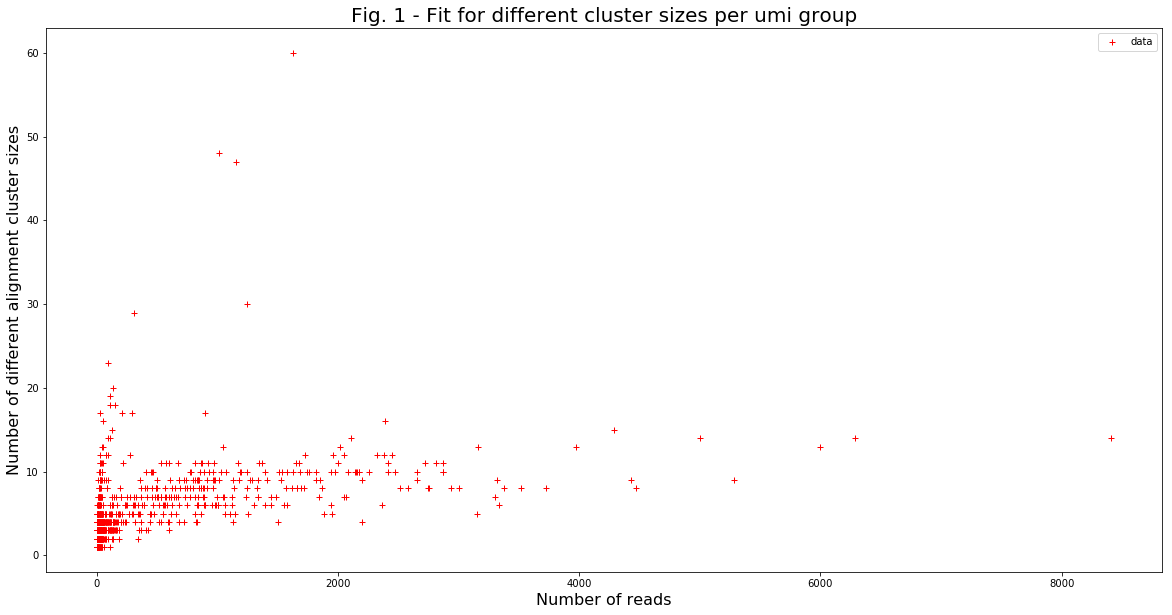

In [132]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

aX = np.array(X)
aY = np.array(Y)

#n = len(aX)                          #the number of data
#mean = sum(aX*aY)/n                   #note this correction
#sigma = sum(aY*(aX-mean)**2)/n        #note this correction

#def gaus(x,a,x0,sigma):
#    return a*exp(-(x-x0)**2/(2*sigma**2))

#popt,pcov = curve_fit(gaus,aX,aY,p0=[1,mean,sigma])

fig = plt.figure(figsize=(20,10))
plt.plot(aX,aY,'r+',label='data')
#plt.plot(aX,gaus(aX,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 1 - Fit for different cluster sizes per umi group', fontsize=20)
plt.xlabel('Number of reads', fontsize=16)
plt.ylabel('Number of different alignment cluster sizes', fontsize=16)
#plt.show()
plt.savefig('/home/parastou/dist1')

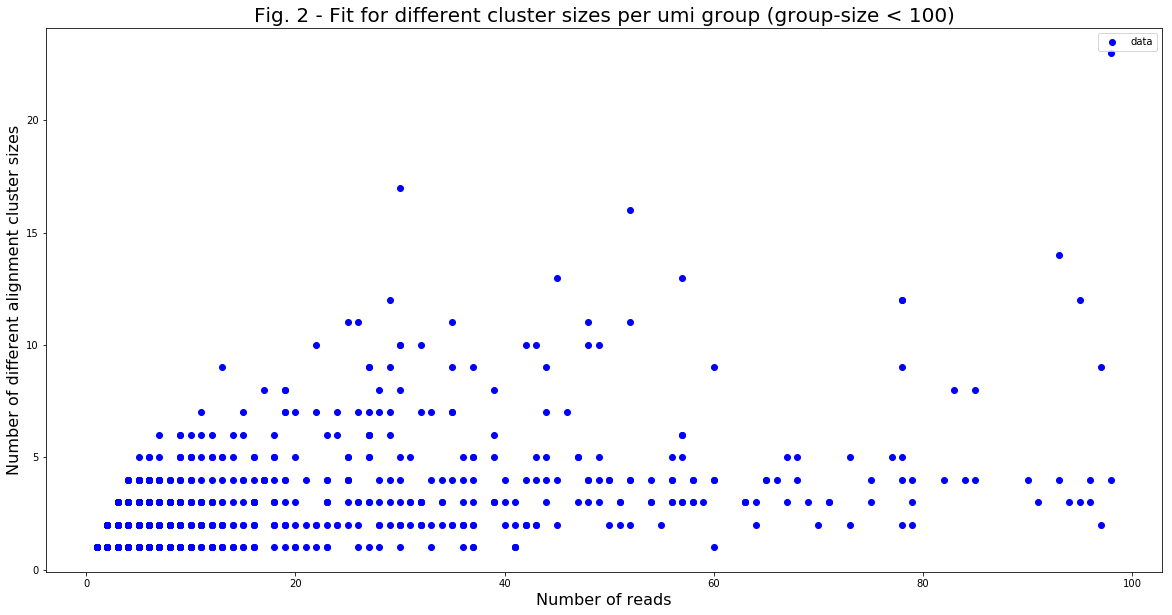

In [62]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

aX = np.array(W)
aY = np.array(Z)

fig = plt.figure(figsize=(20,10))
plt.plot(aX,aY,'bo',label='data')
#plt.plot(aX,gaus(aX,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 2 - Fit for different cluster sizes per umi group (group-size < 100)', fontsize=20)
plt.xlabel('Number of reads', fontsize=16)
plt.ylabel('Number of different alignment cluster sizes', fontsize=16)
#plt.show()
plt.savefig('/home/parastou/dist2')

lost read in interesting case 'L183:338:CAGAAANXX:4:2314:3274:51709'

duo =['L183:338:CAGAAANXX:5:2216:18847:51121', 'L183:338:CAGAAANXX:5:2304:9982:52232']

----------------------------

In [96]:
# method for producing gene name to biotype map (gmap) file
with open('/home/parastou/Desktop/data/parastou/UMI/data/HG/Homo_sapiens.GRCh38.84_chrsNamesUCSC.gtf') as gtf:
    with open('/data/parastou/UMI/data/HG/Homo_sapiens.GRCh38.84_chrsNamesUCSC.gmap','wb') as gmap:
        for line in gtf:
            gene = line.split('\t')[8].split(' ')[1].rstrip('\n').rstrip(';')
            p = line.split('\t')[8].find('gene_biotype ')
            btype = line.split('\t')[8][p+13:].split(' ')[0].rstrip('\n').rstrip(';')
            gmap.write('%s\t%s\n' %(gene,btype))

---------------------------------------

Hamming distance function

In [32]:
import itertools

def hamming(str1, str2):
    return sum(itertools.imap(str.__ne__, str1, str2))

In [7]:
hamming('GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT','GGTCTGAAGTTCAAATACAAGCAACCACATGGTGGCTCACAACCATCTGT')

3

----------------------------